# **1). Predicting Profitability of AirBNBs based on Location**
Fall 2024 Data Science Project

Tutorial by: Alan Jiang, Anand Vinod, Daven Chang, Justin Chen, Ritvik Thakur

Contributions:


1.   Alan Jiang: I updated the project idea/introduction by changing the question to "what makes a good price for an AirBNB?". Additionally, I did part 5: primary analysis.
2.   Anand Vinod:
3.   Daven Chang:
4.   Justin Chen:
5.   Ritvik Thakur:



# **2). Introduction: Rationale behind trying to Predict AirBNB Pricing**

For many people who aren't able to support a system like an apartment complex, allowing unused property to be rented provides a substantial amount of passive revenue. For guests, AirBNBs are convenient, affordable, and often more comfortable than paying for a hotel room. For hosts, AirBNB provides a more convenient and short-term way of renting out a property as opposed to traditional renting. It enables flexibility for specifying what services a host might provide, limiting a certain subsection of property for renting, and minimal fees collected from AirBNB, granting for ample revenue.

For a host, understanding what type of factors play into a property's viability is of importance. Thus, in this tutorial, we seek to answer the question, "What makes a good price for an AirBNB?". We want to inform hosts about how much they should rent their property for and buyers how good of a deal a property is. With New York City being one of the most popular locations, with a diversity in characteristics among its buroughs, we decided to specfically analyze it.


Links:

1.   https://www.investopedia.com/articles/personal-finance/032814/pros-and-cons-using-airbnb.asp



# **3). Data Curation**

[*Inside AirBNB*](https://insideairbnb.com/get-the-data/) provides numerous publically sourced datasets on various metrics and attributes of AirBNBs all over the world, which was perfect for our goal. However, analyzing all AirBNBs at once would be computationally expensive and complex task. For this reason, we decided to specifically narrow our target down to New York City. New York, with its 5 boroughs, is able to demonstrate the effects of [socioeconomic diversity](https://www.nyc.gov/assets/planning/download/pdf/data-maps/census/census2010/t_sf1_dp_nyc_demo.pdf) in the profitability of a location, with a spectrum ranging from the Bronx to Manhattan.

The lite version of the dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/data). This contained the [AB_NYC_2019.csv](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/data) file which we used for our initial data exploration. The file contains listing data for 48,000 different AirBNB's in New York. Note that this dataset was taken from 2019.



In [ ]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


The lite version of the dataset contains the following attributes as shown:


*   'id': The numerical identifier for the listing.
*   'name': The name that the AirBNB rental is listed under.
*   'host_id': The numerical identifier for the host.
*   'host_name': The name of the host.
*   'neighbourhood_group': The burough that the AirBNB is located in.
*   'neighbourhood': The name of the neighbourhood that the AirBNB is located in.
* 'latitude'/'longitude': The latitude and longitude of the given AirBNB location.
* 'room_type': Specifies constraints that the host has put on the rental
* 'price': The amount of dollars it costs to rent the AirBNB for one night.
* 'minimum_nights': The least amount of nights spent at an AirBNB.
* 'number_of_reviews': The number of reviews for the listing.
* 'last_review': The date for which the last review under the listing was submitted.
* 'reviews_per_month': How many reviews the listing recieves on average per month.
* 'calculated_host_listings_count': How many listings the host has in total.
* 'availability_365': How many days of the year the listing in available for rental.





In [ ]:
# Finding missing values for each feature
df.isna().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Note that 'last_review' doesn't seem to be a very important feature, so for now, we can just drop it. Same with 'latitude' and 'longitude', 'neighbourhood_group' will be far more helpful for an analytical model. 'name' is a better identifier than 'id', so we can drop the 'id' feature and drop all entries without a name since there are only 16. 'host_id' is a better identifier than 'host_name' so we can drop the 'host_name' feature as well. This leaves us to deal with the reviews_per_month feature. Given that so many entries are missing, we will correct this using mean imputation.

In [ ]:
df = df.drop(columns=['id', 'host_name', 'last_review', 'latitude', 'longitude'])
df = df.dropna(subset=['name'])

mean_reviews = df['reviews_per_month'].mean()
df['reviews_per_month'] = df['reviews_per_month'].fillna(mean_reviews)
print(df.isna().sum())

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


Now our data is cleaned up and we are ready to explore it.

# **4.) Data Exploration**

To begin our analysis, we want to see whether any of our features have any apparent correlations. We checked this using a heatmap/correlation table. The main dependent variable is price, while all other variables should be independent.

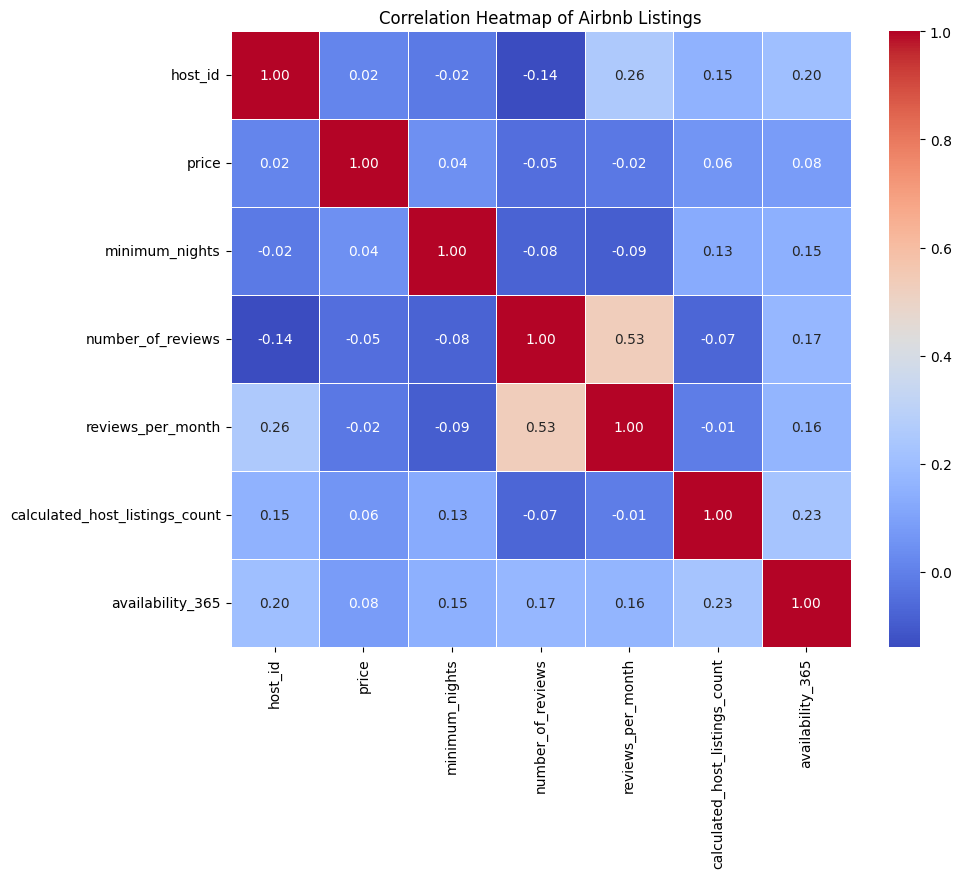

In [ ]:
correlations = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Airbnb Listings')
plt.show()

We see that only really reviews_per_month and number_of_reviews are remotely correlated, which makes sense. Now, lets see if there is any signifance between our categorical variables and price using a histogram.

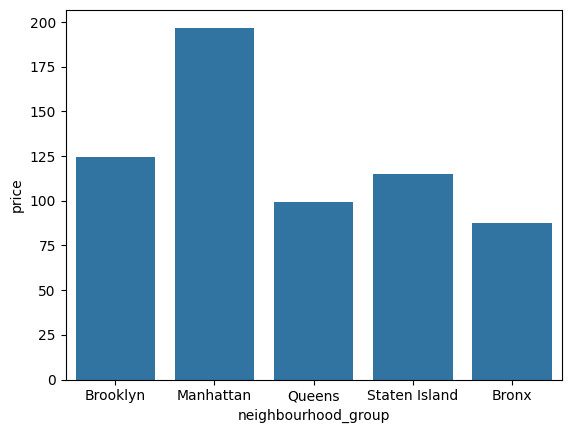

In [ ]:
sns.barplot(data=df, x= "neighbourhood_group", y = "price", errorbar=None)
plt.show()

From the histogram we see that all the neighbourhoods have roughly similar price except for Manhattan. This makes sense since Manhattan is a central position that has all of the tourist locations like Times Square, skyscrapers, and etc. Let's see if there is a statistically signifcant difference in the average pricing in each borough.

Our null hypothesis is that the mean prices across all the boroughs are then same. Our alternative hypothesis is that the mean prices between at one pair of boroughs are significantly different.

In [ ]:
brooklyn_price = df[df['neighbourhood_group'] == 'Brooklyn']['price']
manhattan_price = df[df['neighbourhood_group'] == 'Manhattan']['price']
queens_price = df[df['neighbourhood_group'] == 'Queens']['price']
bronx_price = df[df['neighbourhood_group'] == 'Bronx']['price']
staten_island_price = df[df['neighbourhood_group'] == 'Staten Island']['price']

_, p_val = stats.f_oneway(brooklyn_price, manhattan_price, queens_price, bronx_price, staten_island_price)
p_val

1.2437256616964665e-301

We find that the p value is less than the level of significance, with $α = 0.05$, since $0 < 0.05$. We reject the null hypothesis, and now we want to conduct post-hoc tests to determine which borough(s) has a statistically different price.

In [ ]:
tukey = pairwise_tukeyhsd(df['price'], df['neighbourhood_group'], 0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1      group2    meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------
    Bronx      Brooklyn  36.9379    0.0   16.8501  57.0257   True
    Bronx     Manhattan 109.4196    0.0    89.369 129.4703   True
    Bronx        Queens  12.0599 0.5364   -9.3035  33.4232  False
    Bronx Staten Island  27.3545 0.3035  -11.3919  66.1009  False
 Brooklyn     Manhattan  72.4817    0.0    66.155  78.8084   True
 Brooklyn        Queens -24.8781    0.0  -34.5936 -15.1625   True
 Brooklyn Staten Island  -9.5834  0.938  -43.3366  24.1699  False
Manhattan        Queens -97.3598    0.0 -106.9984 -87.7212   True
Manhattan Staten Island -82.0651    0.0 -115.7963 -48.3339   True
   Queens Staten Island  15.2947 0.7466  -19.2329  49.8223  False
-----------------------------------------------------------------


Our post-hoc tests give us some valuable insights. Manhattan has a statistically significant difference in price than all the other boroughs, being significantly more expensive, which makes sense since it is the main tourist location. Aside from this, Brooklyn also has significantly higher prices than the Bronx and Queens. We conclude logically that Manhattan is the most lucrative location by far, but likely also costs more to mantain an Airbnb in the area.

In [ ]:
df['availability_365'].value_counts()

,count
availability_365,
0,17521
365,1294
364,491
1,408
89,361
...,...
195,26
183,24
196,24


One overrepresented feature we found was that the availability_365, or how many days in 2019 this airbnb was available for booking, is 0. There are a whopping 17533 out of 48895 airbnbs that were not available for booking for various reasons. It could be that the host is living in it instead of renting it out, they only rented it temporarily, or any other reason. Those data points could be less up to date, as they could have not been updated for 2019.

<Axes: title={'center': 'Airbnb Availability in 2019 Frequency Chart'}, xlabel='Days of Availability in 2019', ylabel='Frequency'>

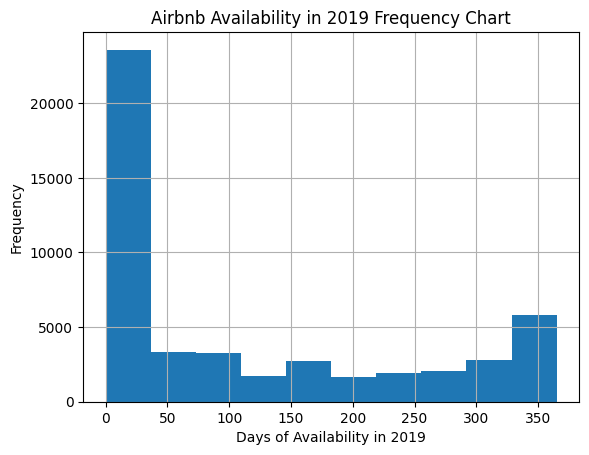

In [ ]:
plt.title("Airbnb Availability in 2019 Frequency Chart")
plt.xlabel("Days of Availability in 2019")
plt.ylabel("Frequency")
df['availability_365'].hist(bins=10)

Null Hypothesis (H₀): There is no association between neighbourhood group and room type. The distribution of room types is the same across all neighbourhood groups.

Alternative Hypothesis (Hₐ): There is an association between neighbourhood group and room type. The distribution of room types is not the same across all neighbourhood groups.

In [ ]:
alpha = 0.05

cols = df[['neighbourhood_group', 'room_type']]

contingency_table = pd.crosstab(df['neighbourhood_group'], df['room_type'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(chi2_stat)
print(p_val)
print(dof)
print(expected)

1555.720331990425
0.0
8
[[5.66463717e+02 4.97690624e+02 2.58456597e+01]
 [1.04447594e+04 9.17668455e+03 4.76556026e+02]
 [1.12523600e+04 9.88623613e+03 5.13403875e+02]
 [2.94457194e+03 2.58707805e+03 1.34350007e+02]
 [1.93844923e+02 1.70310645e+02 8.84443217e+00]]


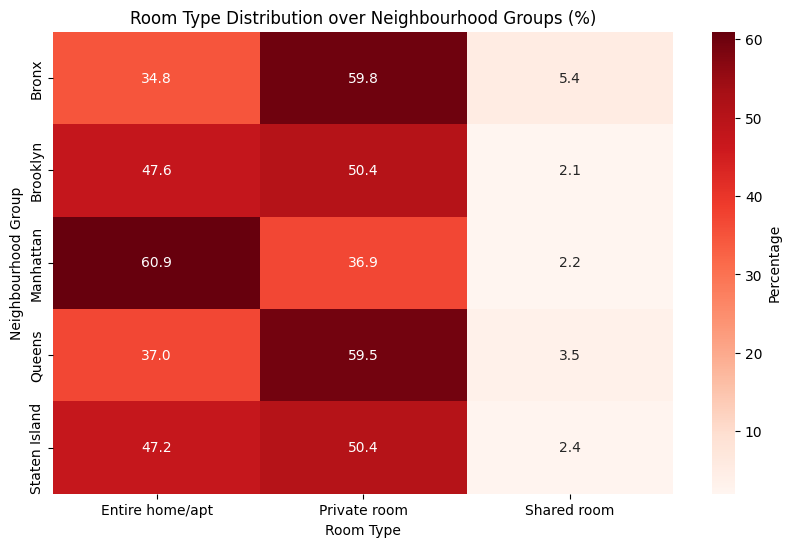

In [ ]:


contingency_table_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_norm, annot=True, fmt=".1f", cmap="Reds", cbar_kws={'label': 'Percentage'})
plt.title("Room Type Distribution over Neighbourhood Groups (%)")
plt.xlabel("Room Type")
plt.ylabel("Neighbourhood Group")
plt.show()

<ipython-input-76-854a48f57696>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ones['zscore'] = stats.zscore(ones['price'])
<ipython-input-76-854a48f57696>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three['zscore'] = stats.zscore(three['price'])


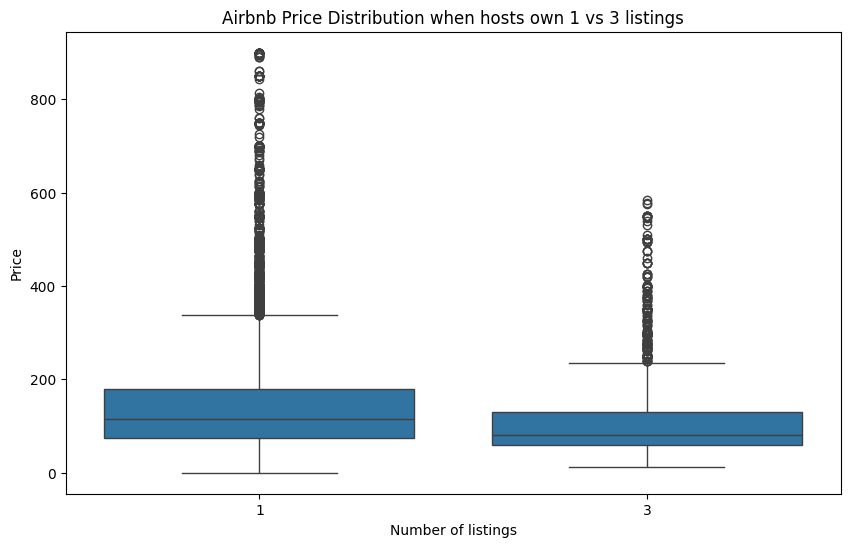

In [ ]:


# comparing price per night of airbnb listings in Brooklyn and Manhattan
ones = df[df['calculated_host_listings_count'] == 1]
three = df[df['calculated_host_listings_count'] == 3]

ones['zscore'] = stats.zscore(ones['price'])
three['zscore'] = stats.zscore(three['price'])

ones_filtered = ones[ones['zscore'].abs() <= 3]
three_filtered = three[three['zscore'].abs() <= 3]



ones_filtered = ones_filtered.drop(columns=['zscore'])
three_filtered = three_filtered.drop(columns=['zscore'])




combined_df = pd.concat([ones_filtered, three_filtered])
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='calculated_host_listings_count', y='price')
plt.title("Airbnb Price Distribution when hosts own 1 vs 3 listings")
plt.xlabel("Number of listings")
plt.ylabel("Price")
plt.show()




Before plotting, we get rid of extreme outlires to have a more accurate result. From the initial plotting of the data, we cal already tell that there is a difference, since the first quartile of properties where the host has 3 listings is greater than the mean of roperties where the host has 1 listings. These are our hypothoses for our t-test:

Null-Hypothesis: The average price of airbnb properties is the same when  owners have a different number of listings.

Alternate-Hypothesis: The average price of airbnb properties is not the same when owners have a different number of listings.

In [ ]:


t_stat, p_val = stats.ttest_ind(ones_filtered['price'], three_filtered['price'])
print(t_stat)
print(p_val)


16.73946812744106
1.1881550723518166e-62


Because our t-test p-value is so low (< 0.05), we reject the null hypothesis and have reasonable evidence to conclude that average Airbnb price of properties where the host has 3 listings is not the same as the average price of properties where the host has 1 listing.

Now, let's do some exploration without tests, simply trying to find interesting properties  of the dataset with visualization. Let's explore the room type feature, and try to figure out the distribution of each room type, and their respective average prices.

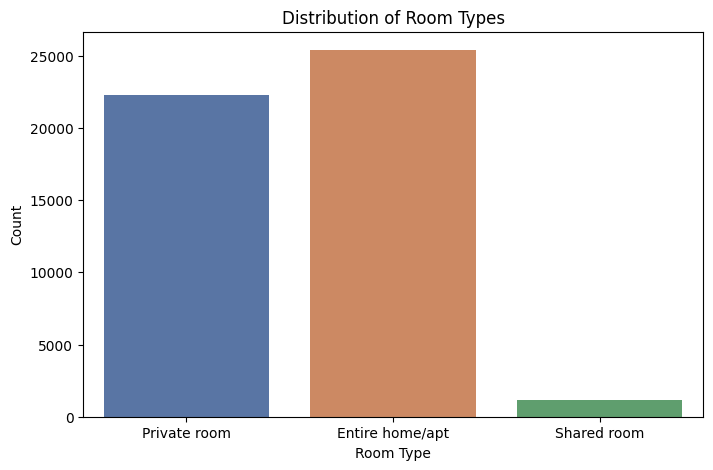

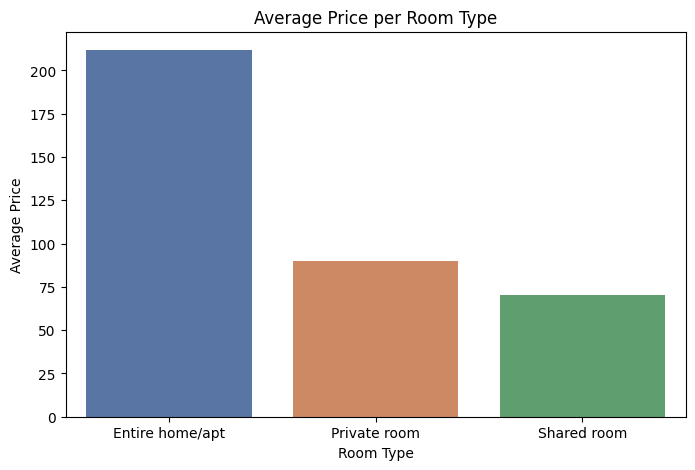

In [ ]:
# Room Type distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='room_type', data=df, hue='room_type', palette='deep', legend=False)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

# Price distribution
avg_price = df.groupby('room_type')['price'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='room_type', y='price', hue='room_type', data=avg_price, palette='deep', legend=False)
plt.title('Average Price per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()


The results are we might expect, there are an near equal amount of listings for private rooms and entire homes, with significantly less shared room listings. Entire homes cost more to rent out, due to the amount of real estate, and then private rooms, and shared rooms are the cheapest, since they are the least luxurious out of all the options. Our analysis should be able to pick up on this feature.

# **5). Primary Analysis**

Because we want to know the price a listing should be, we will use regression. A regression model will give us a price for each listing, letting users figure out how much to rent their property for or how good of a price a property is. This will thus answer our question posed in the introduction.



In [ ]:
# Using new var instead of df so no overwriting
features_df = df.copy()

Now that we are done with Data Exploration, we need to remove a few more columns, as they are irrelavent to predicting price. Namely, we need to remove 'name' and 'host_id'.

In [ ]:
features_df = features_df.drop(columns=['name', 'host_id', 'neighbourhood'])
features_df.head()

KeyError: "['neighbourhood'] not found in axis"

Next, neural networks generally only take in numbers as inputs, so we need to do something about 'neighbourhood_group', 'neighbourhood', and 'room_type'. First, we will check to see how many unique values of each we have.

In [ ]:
print(features_df['neighbourhood_group'].unique())
print(features_df['room_type'].unique())

KeyError: 'neighbourhood_group'

To turn these words into numbers, we will use one-hot encoding. This turns the values in each column into their own column. If the row had that value it would be 1 at the corresponding column. Otherwise, it would be 0. However, neighbourhood has too many values, so we will delete it instead.

Additionally, we change all the types to float to standardize them for the neural network later.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

encoded = encoder.fit_transform(df[['neighbourhood_group', 'room_type']])

encoded = pd.DataFrame(encoded, columns= encoder.get_feature_names_out(['neighbourhood_group', 'room_type']))
df = df.reset_index(drop=True)
encoded = encoded.reset_index(drop=True)
df = pd.concat([df, encoded], axis=1)
df = df.drop(columns=['neighbourhood_group', 'room_type'])

df = df.apply(lambda x: x.astype(float), axis=1)

df.head()

KeyError: "None of [Index(['neighbourhood_group', 'room_type'], dtype='object')] are in the [columns]"

The last thing we need to do to the dataset is standardize the data, so no individual column overpowers the others. To do this, we will use the StandardScaler. First however, we will split the data into X and Y so the StandardScaler doesn't standardize the price as well.

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop("price", axis=1)
y = df["price"].to_numpy()

scaler = StandardScaler().fit(X)
X = scaler.transform(X)
y = scaler.fit_transform(y.reshape(-1, 1)).flatten()

print(X)
print(y)

[[-3.00314180e-01 -3.20524802e-01 -7.76671848e-01 ... -1.04018996e+00
   1.09092420e+00 -1.55844507e-01]
 [-3.00314180e-01  4.87452759e-01 -6.63182857e-01 ...  9.61362869e-01
  -9.16653974e-01 -1.55844507e-01]
 [-2.00393095e-01 -5.22519192e-01  7.85635151e-15 ... -1.04018996e+00
   1.09092420e+00 -1.55844507e-01]
 ...
 [ 1.49330700e-01 -5.22519192e-01  7.85635151e-15 ...  9.61362869e-01
  -9.16653974e-01 -1.55844507e-01]
 [-3.00314180e-01 -5.22519192e-01  7.85635151e-15 ... -1.04018996e+00
  -9.16653974e-01  6.41665219e+00]
 [-5.50926416e-04 -5.22519192e-01  7.85635151e-15 ... -1.04018996e+00
   1.09092420e+00 -1.55844507e-01]]
[-0.01549791  0.30092571 -0.01133444 ... -0.15705584 -0.40686396
 -0.26114256]


Now we will split the data into training and testing. This will help make sure we do not overfit our neural network on the data. Additionally, we will put our data into a dataloader, allowing for random data extraction.


In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

import torch

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
trainset = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
testset = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))
train_loader = DataLoader(trainset, batch_size=32, shuffle=True)
test_loader = DataLoader(testset, batch_size=32, shuffle=True)

feat_dim = len(X_train[0])

print("Feature Dimension:", feat_dim)

Feature Dimension: 13


Finally, we can make our neural network. To do this, we will use a Multi-Layer Perceptron Model class from the torch.nn.Module. This will let us make a custom neural network for our needs.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class MLPModel(nn.Module):
    def __init__(self, feat_dim):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(feat_dim, 128, dtype=torch.float64)
        self.fc2 = nn.Linear(128, 64, dtype=torch.float64)
        self.fc3 = nn.Linear(64, 1, dtype=torch.float64)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

model = MLPModel(feat_dim)
num_layers = len(list(model.children()))
input_dim = list(model.children())[0].in_features
output_dim = list(model.children())[-1].out_features

print(list(model.children()))
print("Number of Layers:", num_layers)
print("Input Dimension:", input_dim)
print("Output Dimension:", output_dim)

[Linear(in_features=13, out_features=128, bias=True), Linear(in_features=128, out_features=64, bias=True), Linear(in_features=64, out_features=1, bias=True)]
Number of Layers: 3
Input Dimension: 13
Output Dimension: 1


Now, we need to train this neural network. To do this, we will use the MSELoss function and the Adam optimizer, which finds the loss and updates the weights respectively. We use the dataloader we got previously to get the data for training.

In [ ]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)

epochs = 100
losses = []
for epoch in range(epochs):
    running_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass: calculates losses from the data and your model.
        prediction = model(data)
        loss = criterion(prediction, targets)

        # Backward pass: updates your network from the loss gradients.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

print('Finished Training')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([31])) that is different to the input size (torch.Size([31, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/100, Loss: 0.12322211840194974
Epoch 2/100, Loss: 0.09468092645082245
Epoch 3/100, Loss: 0.141674218573773
Epoch 4/100, Loss: 0.08966818161051418
Epoch 5/100, Loss: 0.07486528491105168
Epoch 6/100, Loss: 0.23110280374619005
Epoch 7/100, Loss: 0.7172498009300834
Epoch 8/100, Loss: 0.10308259939565378
Epoch 9/100, Loss: 4.619929666891944
Epoch 10/100, Loss: 0.17798984336055348
Epoch 11/100, Loss: 0.11189330507980809
Epoch 12/100, Loss: 0.19560952231232426
Epoch 13/100, Loss: 2.0990143885667143
Epoch 14/100, Loss: 0.34924257654687657
Epoch 15/100, Loss: 0.33359222284544693
Epoch 16/100, Loss: 0.11944873118921215
Epoch 17/100, Loss: 0.22358380759796126
Epoch 18/100, Loss: 0.16896421054546967
Epoch 19/100, Loss: 0.1204329690077044
Epoch 20/100, Loss: 0.10026515610432452
Epoch 21/100, Loss: 0.2524580023967281
Epoch 22/100, Loss: 0.8320607371986302
Epoch 23/100, Loss: 0.09099542601482347
Epoch 24/100, Loss: 0.1695383868527727
Epoch 25/100, Loss: 0.3517723392036952
Epoch 26/100, Loss: 

Finally, we are done training. To test the neural network, we will use the test_loader from previously to find the loss. Additionally, we will plot the graph of the losses over time from the training.

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train Loss: 1.0907120577485612
Test Loss: 0.6358962575557461


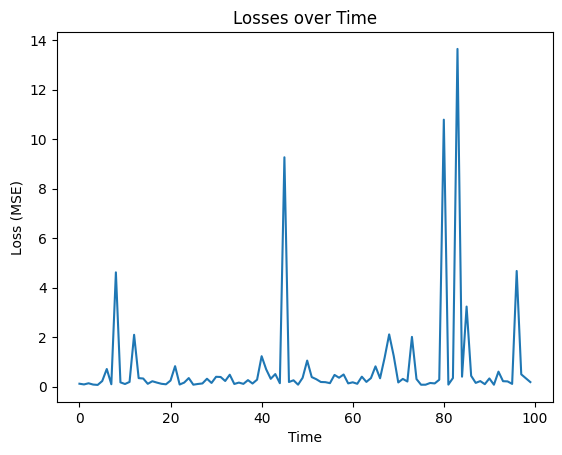

In [ ]:
test_loss = 0.0
for batch_idx, (data, targets) in enumerate(test_loader):
    loss = criterion(model(data), targets)
    test_loss += loss.item()
test_loss = test_loss / len(test_loader)

train_loss = 0.0
for batch_idx, (data, targets) in enumerate(train_loader):
    loss = criterion(model(data), targets)
    train_loss += loss.item()
train_loss = train_loss / len(train_loader)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

plt.plot(losses)
plt.title("Losses over Time")
plt.xlabel("Time")
plt.ylabel("Loss (MSE)")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the decision tree model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

R-squared: -0.4240279624264982
Mean Squared Error: 1.5307752843886084
